<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/The%20Basics/automatic_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [1]:
!pip install mxnet

Importing Libraries

In [0]:
from mxnet import autograd, nd
from math import log, pi
import matplotlib.pyplot as plt

A Simple Example

In [3]:
x = nd.arange(4).reshape((4, 1))
print(x)


[[0.]
 [1.]
 [2.]
 [3.]]
<NDArray 4x1 @cpu(0)>


In [4]:
x.attach_grad()
with autograd.record():
    y = 2 * nd.dot(x.T, x)
print(y)


[[28.]]
<NDArray 1x1 @cpu(0)>


In [0]:
y.backward()

In [6]:
print((x.grad - 4 * x).norm().asscalar() == 0)
print(x.grad)

True

[[ 0.]
 [ 4.]
 [ 8.]
 [12.]]
<NDArray 4x1 @cpu(0)>


Another Example

In [7]:
x = nd.arange(9).reshape((3, -1))
print(x)

x.attach_grad()
with autograd.record():
    y = nd.log(x)
print(y)

y.backward()
print(x.grad)
print(nd.reciprocal(x))


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
<NDArray 3x3 @cpu(0)>

[[     -inf 0.        0.6931472]
 [1.0986123 1.3862944 1.609438 ]
 [1.7917595 1.9459101 2.0794415]]
<NDArray 3x3 @cpu(0)>

[[       inf 1.         0.5       ]
 [0.33333334 0.25       0.2       ]
 [0.16666667 0.14285715 0.125     ]]
<NDArray 3x3 @cpu(0)>

[[       inf 1.         0.5       ]
 [0.33333334 0.25       0.2       ]
 [0.16666667 0.14285715 0.125     ]]
<NDArray 3x3 @cpu(0)>


Training Mode and Prediction Mode

In [8]:
print(autograd.is_training())
with autograd.record():
    print(autograd.is_training())

False
True


Computing the Gradient of Python Control Flow

In [0]:
def f(a):
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
    if b.sum().asscalar() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [10]:
a = -2 * nd.ones(shape=1)
print(a)

a.attach_grad()
with autograd.record():
  # Below thing means you can compute the function using normal python control flow
  d = f(a)
print(d)

d.backward()
# Since the function which we created is linear, the following holds true
print(a.grad == (d / a))


[-2.]
<NDArray 1 @cpu(0)>

[-102400.]
<NDArray 1 @cpu(0)>

[1.]
<NDArray 1 @cpu(0)>


Head gradients and the chain rule

In [11]:
x = nd.arange(4).reshape(shape=(4, -1))
print(x)

x.attach_grad()
with autograd.record():
    y = x * 2
    z = y * x

# here head_gradient is called dz/dy
head_gradient = nd.array([10, 1., .1, .01])
z.backward(head_gradient)
print(x.grad)


[[0.]
 [1.]
 [2.]
 [3.]]
<NDArray 4x1 @cpu(0)>

[[0.  ]
 [4.  ]
 [0.8 ]
 [0.12]]
<NDArray 4x1 @cpu(0)>


In [12]:
x = nd.arange(4).reshape(shape=(4, -1))
print('x : ', x)

x.attach_grad()
with autograd.record():
    y = x * 2
print('y : ', y)

y.backward()
dydx = x.grad
print('dydx : ', dydx)

x :  
[[0.]
 [1.]
 [2.]
 [3.]]
<NDArray 4x1 @cpu(0)>
y :  
[[0.]
 [2.]
 [4.]
 [6.]]
<NDArray 4x1 @cpu(0)>
dydx :  
[[2.]
 [2.]
 [2.]
 [2.]]
<NDArray 4x1 @cpu(0)>


In [13]:
x.attach_grad()
with autograd.record():
    z = y * x 
print('z : ', z)

z.backward(dydx)
dzdx = x.grad
print('dzdx : ', dzdx)

z :  
[[ 0.]
 [ 2.]
 [ 8.]
 [18.]]
<NDArray 4x1 @cpu(0)>
dzdx :  
[[ 0.]
 [ 4.]
 [ 8.]
 [12.]]
<NDArray 4x1 @cpu(0)>


Exercises

In [14]:
a = nd.random.normal(shape=(3,2))
print(a)

a.attach_grad()
with autograd.record():
  d = f(a)
print(d)

d.backward()
print(((a.grad == (d / a)) - nd.ones(shape=(3,2))).norm().asscalar() == 0)


[[ 2.2122064  0.7740038]
 [ 1.0434403  1.1839255]
 [ 1.8917114 -1.2347414]]
<NDArray 3x2 @cpu(0)>

[[1132.6497   396.28995]
 [ 534.24146  606.16986]
 [ 968.5562  -632.1876 ]]
<NDArray 3x2 @cpu(0)>
True


In [15]:
def f1(a):
    i = 0
    b = a
    while i < 4:
      b = b * a
      i += 1
    return b
  
a = 2 * nd.ones(shape=(1,1))
print('a : ', a)
a.attach_grad()
with autograd.record():
  c = f1(a)
print('c : ', c)

c.backward()
print('a.grad : ', a.grad)
print('verify gradient : ', a.grad == 5 * nd.power(a, 4))

a :  
[[2.]]
<NDArray 1x1 @cpu(0)>
c :  
[[32.]]
<NDArray 1x1 @cpu(0)>
a.grad :  
[[80.]]
<NDArray 1x1 @cpu(0)>
verify gradient :  
[[1.]]
<NDArray 1x1 @cpu(0)>


In [16]:
highest_bid = nd.random.normal(4, 1, shape=(1,1))
print('highest_bid : ', highest_bid)

highest_bid.attach_grad()
with autograd.record():
  second_highest_price = nd.abs(nd.random.normal(shape=(1,1)))
print('winning_bid/second_highest_price : ', second_highest_price)

second_highest_price.backward()
print(highest_bid.grad)

# we are calculating gradient of winning_bid/second_highest_price with respect to highest_bid.
# Since the second_highest_price doesn't depend on highest_bid, we cannot compute the gradient and it throws below error

highest_bid :  
[[2.228971]]
<NDArray 1x1 @cpu(0)>
winning_bid/second_highest_price :  
[[0.45138445]]
<NDArray 1x1 @cpu(0)>


MXNetError: ignored

In [0]:
# I think mxnet still doesn't support computing higher order derivatives.
# Second derivative is much more expensive to compute than the first derivative because I believe autograd needs to retain graph and compute again inorder to find second order derivate 

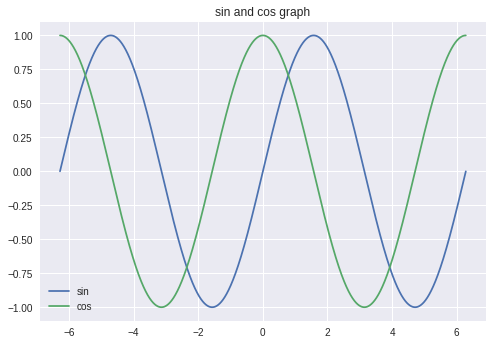

In [18]:
x = nd.arange(-2 * pi, 2 * pi, 0.001)
x.attach_grad()

with autograd.record():
  y = nd.sin(x)

y.backward()

plt.plot(x.asnumpy(), y.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.legend(['sin', 'cos'], loc='lower left')
plt.title('sin and cos graph')
plt.show()